Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import joblib
import json

In [3]:
df = pd.read_csv("data_2020.csv")

In [4]:
models_dict = joblib.load("best_models_dict.joblib")

In [5]:
preds_2020 = {}

In [6]:
for region, components in models_dict.items():
    prep = components.get("prep", {})
    scaler = prep.get("Scaler")
    pca = prep.get("PCA")
    plsr = prep.get("PLSR")
    model = components.get("model")

    print("Region: ", region)
    print("Scaler: ", scaler)
    print("PCA: ", pca)
    print("PLSR: ",plsr)
    print("Model: ", model)
    print("-"*10)

Region:  NSW Barwon Darling
Scaler:  StandardScaler()
PCA:  PCA(n_components=0.95)
PLSR:  None
Model:  DecisionTreeRegressor(max_depth=2, max_features='sqrt', min_samples_leaf=3,
                      random_state=42)
----------
Region:  NSW Border Rivers
Scaler:  StandardScaler()
PCA:  PCA(n_components=0.95)
PLSR:  None
Model:  DecisionTreeRegressor(max_depth=3, max_features='sqrt', min_samples_split=3,
                      random_state=42)
----------
Region:  NSW Gwydir
Scaler:  StandardScaler()
PCA:  PCA(n_components=0.95)
PLSR:  None
Model:  DecisionTreeRegressor(max_depth=3, max_features=5, random_state=42)
----------
Region:  NSW Lachlan
Scaler:  None
PCA:  None
PLSR:  None
Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=

In [7]:
predictions = {}

for region, components in models_dict.items():
    prep = components.get("prep", {})
    scaler = prep.get("Scaler")
    pca = prep.get("PCA")
    plsr = prep.get("PLSR")
    model = components.get("model")

    X_proc = df[df["Region"] == region].drop("Region", axis = 1)

    # Apply preprocessing
    if scaler is not None:
        X_proc = scaler.transform(X_proc)
    if pca is not None:
        X_proc = pca.transform(X_proc)
    elif plsr is not None:
        X_proc = plsr.transform(X_proc)

    # Predict
    preds = model.predict(X_proc)
    preds_2020[region] = abs(preds[0]).astype(float) # because of bayesian ridge

In [8]:
preds_2020

{'NSW Barwon Darling': np.float64(65906.372034),
 'NSW Border Rivers': np.float64(65294.793867500004),
 'NSW Gwydir': np.float64(70580.34016666666),
 'NSW Lachlan': np.float64(27733.435546875),
 'NSW Lower Darling': np.float64(865.0050249076824),
 'NSW Macquarie-Castlereagh': np.float64(59087.6953125),
 'NSW Murray Above': np.float64(1475.994508289099),
 'NSW Murrumbidgee': np.float64(90510.1796875),
 'NSW Namoi': np.float64(93209.72786837003),
 'QLD Border Rivers': np.float64(80525.83051000001),
 'QLD Condamine-Balonne': np.float64(163740.7491),
 'QLD Moonie': np.float64(3798.5769811199993)}

In [9]:
with open("predictions_2020.json", "w") as file:
    json.dump(preds_2020, file)

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

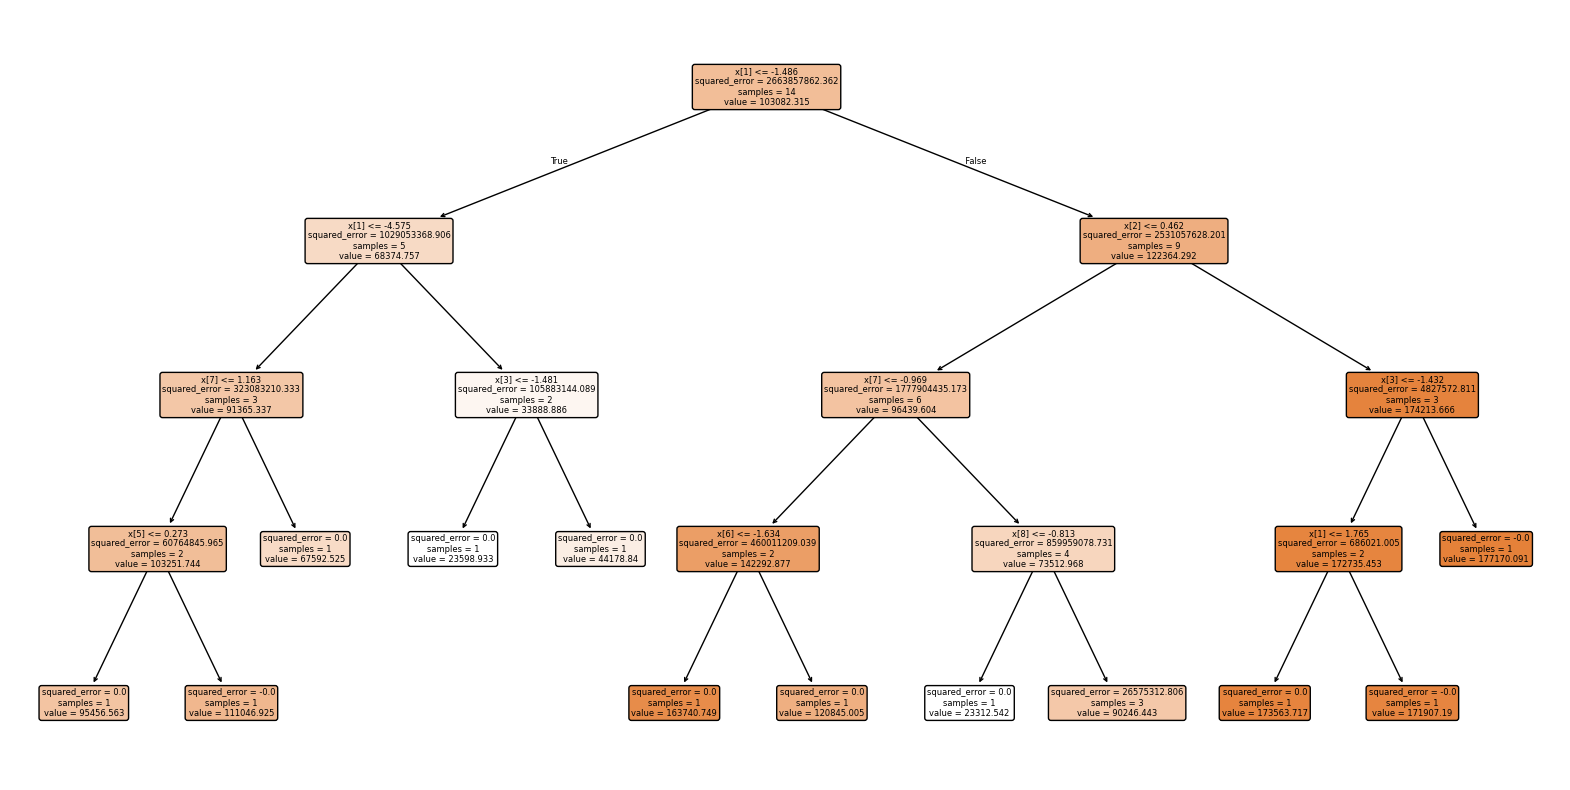

In [25]:
tree = models_dict['QLD Condamine-Balonne']["model"]
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, rounded=True)
plt.show();